# 第8章 回帰２：住宅の平均価格の予測

家賃（円）を予測するモデルを構築しましょう。  
読み込むCSVファイル「house_rent.csv」

準備として、matplotlibで日本語を表示するためのライブラリを読み込みます

In [ ]:
!pip install japanize-matplotlib
import japanize_matplotlib

     |████████████████████████████████| 4.1 MB 25.0 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=4f750cba88c3cbb54993a91d78b8bad038d6a3f278a49c865b5c71f475098c48
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


**問1**  
必要なライブラリ、モジュールメソッドのインポートをしてください。  
また、matplotlibの図をセルに表示できるように設定してください。

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

**問2**  
「house_rent.csv」を読み込み、先頭の5行を表示してください。  
なお、エンコーディングは'cp932'を使用してください。

In [ ]:
df = pd.read_csv('house_rent.csv', encoding='cp932')
df.head()

,所在地,家賃,敷金,礼金,面積,築年数,駅徒歩分,間取,方位,構造
0,市川市真間,60000,1,1.0,23.15,19.0,7.0,1K,南,軽量鉄骨
1,市川市新田,77000,2,1.0,23.19,16.0,2.0,1K,南東,木造
2,市川市市川南,65500,1,1.0,NaN,20.0,6.0,1K,西,木造
3,市川市大洲,65000,2,1.0,28.92,120.0,10.0,1DK,南東,木造
4,市川市真間,60000,1,1.0,32.05,19.0,10.0,1DK,南,木造


▶実行結果  
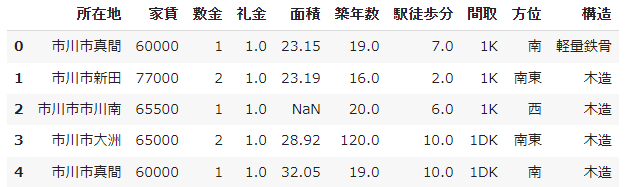

**問3**  
読み込んだデータの行数と列数を表示してください

In [ ]:
print(df.shape[0], '行')
print(df.shape[1], '列')

304 行
10 列


▶実行結果  
304 行  
10 列

**問4**  
各列の欠損値の個数を表示してください

In [ ]:
df.isnull().sum()

所在地     0
家賃      0
敷金      0
礼金      0
面積      1
築年数     1
駅徒歩分    3
間取      0
方位      0
構造      0
dtype: int64

**問5**  
欠損値のある行のみを表示してください

In [ ]:
# ヒント
# df.isnull()でどのセルが欠損値かTrue/Falseを得る。
# その結果に対して、any(axis=●)で『どこかの「列」に欠損値があるかどうか』を調べる
# 結果として、行ごとの欠損値の有無を示すTrue/Falseを得られる。
# これを変数flgに代入する
flg = df.isnull().any(axis=1)

# flgを利用して、欠損値のある行を表示する
df[flg]

,所在地,家賃,敷金,礼金,面積,築年数,駅徒歩分,間取,方位,構造
2,市川市市川南,65500,1,1.0,NaN,20.0,6.0,1K,西,木造
5,市川市新田,57000,1,1.0,19.00,19.0,NaN,1R,南,木造
15,市川市大洲,55000,1,1.0,20.31,18.0,NaN,1K,西,木造
75,市川市新田,65000,2,1.0,22.98,0.0,NaN,1K,南,軽量鉄骨
299,市川市新田,64000,2,1.0,22.01,NaN,5.0,1R,南,木造


▶実行結果  
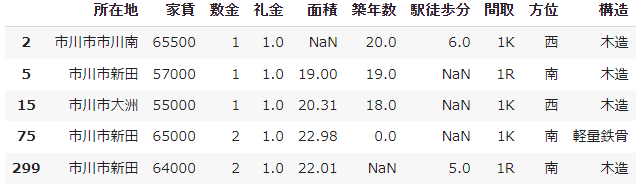

**問6**  
全ての欠損値を平均値で穴埋めし、変数df_fillnaに代入してください。  
また、穴埋めしたあとに各列の欠損値の個数を表示し、欠損値が無いことを確認してください。

In [ ]:
df_fillna = df.fillna(df.mean())
df_fillna.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


所在地     0
家賃      0
敷金      0
礼金      0
面積      0
築年数     0
駅徒歩分    0
間取      0
方位      0
構造      0
dtype: int64

**問7**  
質的データの列('所在地','間取','方位','構造)ごとに、データの種類ごとの出現回数を表示してください

In [ ]:
for col in ['所在地','間取','方位','構造']:
  print('===', col, '===')
  print(df_fillna[col].value_counts())

=== 所在地 ===
市川市新田     104
市川市市川南     74
市川市真間      42
市川市大洲      30
市川市市川      26
市川市菅野      20
市川市須和田      3
市川市平田       3
市川市大町       1
市川市大和田      1
Name: 所在地, dtype: int64
=== 間取 ===
1K     229
1R      44
1DK     31
Name: 間取, dtype: int64
=== 方位 ===
南     167
南東     48
東      30
西      26
南西     26
北東      4
北       3
Name: 方位, dtype: int64
=== 構造 ===
木造      250
軽量鉄骨     44
鉄骨造      10
Name: 構造, dtype: int64


▶実行結果  
（一部列のみ表示しています。必要な列を同様に表示してください）  
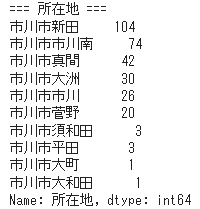

**問8**  
質的データをすべてダミー化したデータフレームdf_for_analyzeを作成してください。  
また、作成したデータフレームの先頭5行を表示してください。  
これ以降は、このデータフレームをデータ分析用のデータフレームとします。


In [ ]:
# df全体をget_dummiesし、量的データはそのまま、質的データはダミー化した結果（この後の分析で使用するデータフレーム）を取得する
df_for_analyze = pd.get_dummies(df_fillna, drop_first=True)
df_for_analyze.head()

,家賃,敷金,礼金,面積,築年数,駅徒歩分,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,所在地_市川市平田,所在地_市川市新田,所在地_市川市真間,所在地_市川市菅野,所在地_市川市須和田,間取_1K,間取_1R,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_軽量鉄骨,構造_鉄骨造
0,60000,1,1.0,23.150000,19.0,7.0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,77000,2,1.0,23.190000,16.0,2.0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2,65500,1,1.0,21.658878,20.0,6.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,65000,2,1.0,28.920000,120.0,10.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60000,1,1.0,32.050000,19.0,10.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


ここまでで【欠損値対処済み】、【ダミー変数化済み】の分析用データフレームdf_for_analyzeが完成した状態になります

**問9**  
データ分析用のデータフレームの行数と列数を表示してください

In [ ]:
print(df_for_analyze.shape[0], '行')
print(df_for_analyze.shape[1], '列')

304 行
25 列


▶実行結果  
304 行  
25 列

**問10**  
データ分析用のデータフレームを訓練データ＆検証データ、テストデータに分割してください。  
テストデータは20%、乱数シードは0とします。  
訓練データ＆検証データは変数train_valに代入してください。
テストデータは変数testに代入するしてください。
また、訓練データ＆検証データ、テストデータのそれぞれの行数と列数を表示してください。

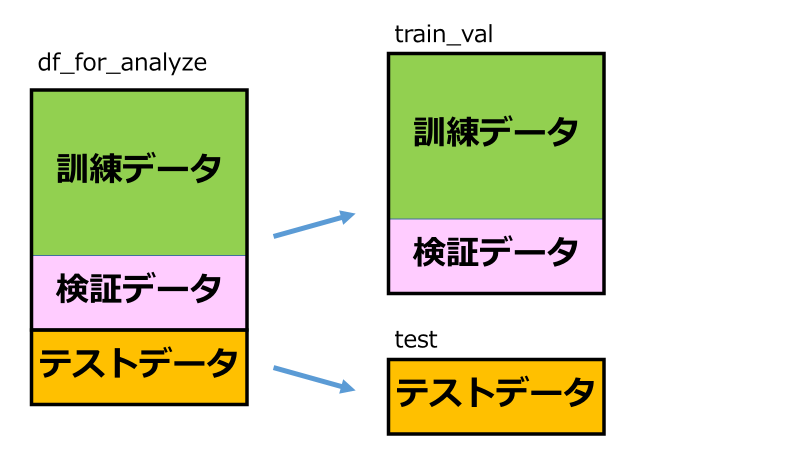

In [ ]:
# 訓練データ＆検証データ、テストデータに分割する
train_val, test = train_test_split(df_for_analyze, test_size=0.2, random_state=0)

print('訓練＆検証データ')
print(train_val.shape[0], '行')
print(train_val.shape[1], '列')
print('テストデータ')
print(test.shape[0], '行')
print(test.shape[1], '列')

訓練＆検証データ
243 行
25 列
テストデータ
61 行
25 列


▶実行結果  
訓練＆検証データ  
243 行  
25 列  
テストデータ  
61 行  
25 列  

**問11**  
訓練データにおいて、'家賃'を基準に、'敷金','礼金','面積','築年数','駅徒歩分'との散布図をそれぞれ作成してください。

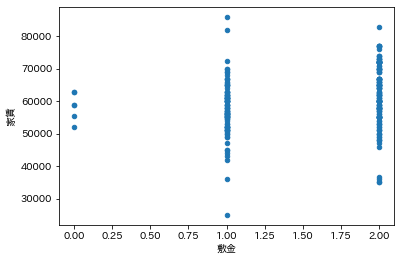

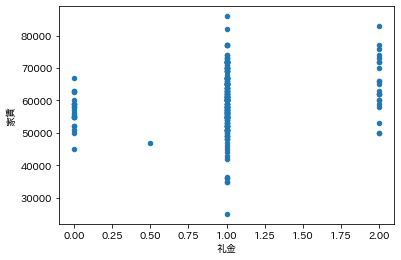

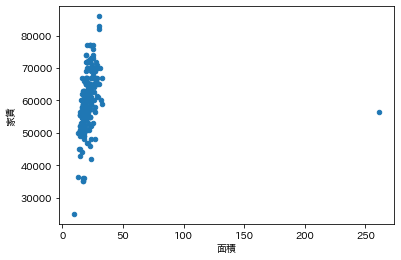

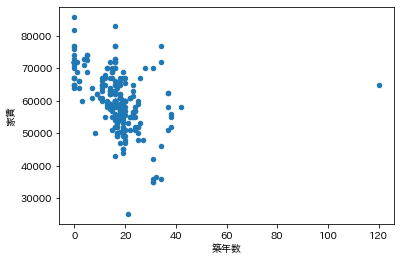

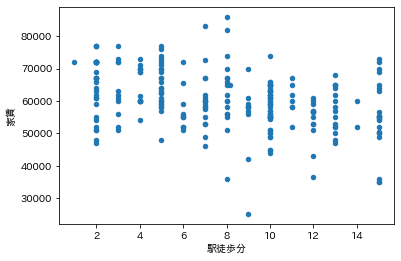

In [ ]:
for name in ['敷金','礼金','面積','築年数','駅徒歩分']:
  train_val.plot(kind='scatter', x=name, y='家賃')

**問12**  
散布図を確認し、面積から1つ外れ値を選んで、該当行を削除してください。

In [ ]:
# 除去対象のデータのindexを取得する
outlier1 = train_val[ train_val['面積'] > 250 ].index

# train_valから該当行を削除し、train_val_droppedに代入する
train_val_dropped = train_val.drop(outlier1, axis=0)

**問13**  
散布図を確認し、築年数から1つ外れ値を選んで、該当行を削除してください。

In [ ]:
# 除去対象のindexを取得する
outlier2 = train_val[train_val['築年数'] > 100].index

# train_val_droppedから該当行を削除し、train_val_droppedに代入し直す
train_val_dropped = train_val.drop(outlier2, axis=0)


**問14**  
家賃と面積、家賃と築年数 の2つの散布図を表示し、外れ値が削除されていることを確認してください。

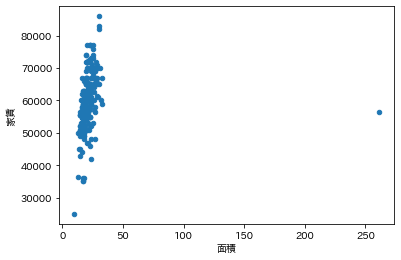

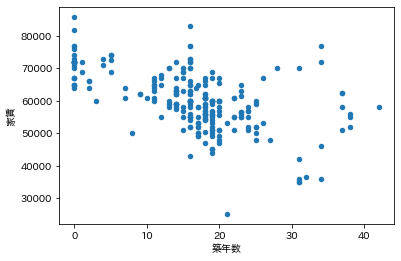

In [ ]:
# 外れ値が削除できていることを散布図で確認する
train_val_dropped.plot(kind='scatter', x='面積', y='家賃')
train_val_dropped.plot(kind='scatter', x='築年数', y='家賃')

**問15**  
家賃 とそれ以外の各列の相関係数を、絶対値の降順に表示してください。

In [ ]:
# 「家賃」と各列の相関係数を取得する
train_val_cor = train_val_dropped.corr()['家賃']

# 相関係数を絶対値化し、降順に表示する
train_val_cor.map(abs).sort_values(ascending = False)

家賃            1.000000
築年数           0.556020
所在地_市川市新田     0.381054
駅徒歩分          0.366955
所在地_市川市市川     0.281139
敷金            0.220730
礼金            0.207511
所在地_市川市菅野     0.206399
方位_南東         0.206327
間取_1R         0.194064
所在地_市川市大洲     0.175232
所在地_市川市須和田    0.143547
間取_1K         0.141494
面積            0.118386
方位_東          0.092934
方位_南          0.076077
所在地_市川市平田     0.073084
方位_南西         0.051248
構造_鉄骨造        0.043390
方位_西          0.042043
所在地_市川市市川南    0.036823
所在地_市川市大町     0.033582
方位_北東         0.031342
構造_軽量鉄骨       0.029934
所在地_市川市真間     0.019071
Name: 家賃, dtype: float64

**問16**  
任意の列を特徴量として決め、下記の解答欄に記載してください。

**解答欄**  

['築年数','面積','所在地_市川市新田','駅徒歩分', '所在地_市川市市川', '敷金', '礼金', '所在地_市川市菅野', '方位_南東']  
[ここに記述する]

**問17**  
上記で選んだ特徴量と、正解データを取り出して、それぞれの先頭5行を表示してください。

In [ ]:
x_col = ['築年数','面積','所在地_市川市新田','駅徒歩分', '所在地_市川市市川', '敷金', '礼金', '所在地_市川市菅野', '方位_南東']
x_train_val = train_val_dropped[x_col]
y_train_val = train_val_dropped[['家賃']]

print('===正解データ')
print(y_train_val.head())

print('===特徴量')
print(x_train_val.head())

===正解データ
        家賃
176  69000
26   70000
74   65000
101  51000
154  72000
===特徴量
      築年数     面積  所在地_市川市新田  駅徒歩分  所在地_市川市市川  敷金   礼金  所在地_市川市菅野  方位_南東
176   1.0  19.87          0   2.0          0   2  1.0          0      0
26   28.0  31.53          1   8.0          0   2  2.0          0      0
74   12.0  28.92          0  10.0          0   2  1.0          0      1
101  20.0  20.50          0   2.0          1   1  1.0          0      0
154   0.0  20.70          1   2.0          0   2  1.0          0      0


**問18**  
上記で取り出した正解データと特徴量を、訓練データ と 検証データ に分割してください。  
ただし、検証データは20%、乱数シードは0とします。  
分割後、訓練データの特徴量の行数、検証データの特徴量の行数を表示してください

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 0.2, random_state = 0)

print('===訓練データ 特徴量')
print(x_train.shape[0], '行')

print('===訓練データ 正解データ')
print(y_train.shape[0], '行')

===訓練データ 特徴量
193 行
===訓練データ 正解データ
193 行


▶実行結果  
===訓練データ 特徴量  
192 行  
===訓練データ 正解データ  
192 行

**問19**  
線形回帰モデルを使用して訓練データで学習させ、検証データの決定係数を求めてください。  
（今回は標準化しなくて構いません）

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_val, y_val)

0.3791181531321044

▶実行結果  
(値は各自の実施内容によって異なります)  
0.5933938983420347

**問20**  
特徴量エンジニアリングで 検証データの決定係数 が0.65以上になることを目標にしてください。
この際、以下のlearn関数を使用してください。

In [ ]:
# チューニングで学習を試しやすいようlearn関数を定義する（実装済み）
def learn(x, t):
    x_train, x_val, y_train, y_val = train_test_split(x, t, test_size = 0.2, random_state = 0)
    # 訓練データを標準化
    sc_model_x = StandardScaler()
    sc_model_y = StandardScaler()
    sc_model_x.fit(x_train)
    sc_x_train = sc_model_x.transform(x_train)
    sc_model_y.fit(y_train)
    sc_y_train = sc_model_y.transform(y_train)

    # 学習
    model = LinearRegression()
    model.fit(sc_x_train, sc_y_train)

    #検証データを標準化
    sc_x_val = sc_model_x.transform(x_val)
    sc_y_val = sc_model_y.transform(y_val)

    # 訓練データと検証データの決定係数計算
    train_score = model.score(sc_x_train, sc_y_train)
    val_score = model.score(sc_x_val, sc_y_val)
    return train_score, val_score

In [ ]:
# 作業用にデータフレームをコピーしておく（実装済み）
x_train_val2 = x_train_val.copy()
y_train_val2 = y_train_val.copy()

この下からチューニングのプログラムを記述してください。必要なだけセルを追加して構いません。

In [ ]:
## 下記の列をそれぞれ2乗、3乗した列を特徴量に追加する

# 最初は全ての列を加えたが、検証データでの決定係数が良くなかったため、過学習が起きている
# 列を減らしながら、検証データでの決定係数の高いものを探した

# 特徴量の列 「築年数」「面積(㎡)」「駅徒歩分」それぞれ2乗した列を追加
x_train_val2['築年数2'] = x_train_val2['築年数'] ** 2
#x_train_val2['面積2'] = x_train_val2['面積'] ** 2
#x_train_val2['駅徒歩分'] = x_train_val2['駅徒歩分'] ** 2
#x_train_val2['敷金'] = x_train_val2['敷金'] ** 2
#x_train_val2['礼金'] = x_train_val2['礼金'] ** 2


# 特徴量の列 「築年数」「面積(㎡)」「駅徒歩分」それぞれ3乗した列を追加
x_train_val2['築年数3'] = x_train_val2['築年数'] ** 3
x_train_val2['面積3'] = x_train_val2['面積'] ** 3
x_train_val2['駅徒歩分3'] = x_train_val2['駅徒歩分'] ** 3
#x_train_val2['敷金3'] = x_train_val2['敷金'] ** 3
#x_train_val2['礼金3'] = x_train_val2['礼金'] ** 3


## 交互作用特徴量を追加
x_train_val2['築年数*面積'] = x_train_val2['築年数'] * x_train_val2['面積']
x_train_val2['築年数*敷金'] = x_train_val2['築年数'] * x_train_val2['敷金']
x_train_val2['駅徒歩分*敷金'] = x_train_val2['駅徒歩分'] * x_train_val2['敷金']
x_train_val2['駅徒歩分*礼金'] = x_train_val2['駅徒歩分'] * x_train_val2['礼金']

## 学習させる
learn(x_train_val2, y_train_val2)

(0.7291806830335659, 0.6214695257555729)

▶実行結果  
(値は各自の実施内容によって異なります)  
(0.7268020591964712, 0.6943601272077751)

**問21**  
チューニング後の特徴量の列を全て表示してください。

In [ ]:
# 最終的に使用した特徴量
x_train_val2.columns

Index(['築年数', '面積', '所在地_市川市新田', '駅徒歩分', '所在地_市川市市川', '敷金', '礼金', '所在地_市川市菅野',
       '方位_南東', '築年数2', '築年数3', '面積3', '駅徒歩分3', '築年数*面積', '築年数*敷金', '駅徒歩分*敷金',
       '駅徒歩分*礼金'],
      dtype='object')

**問22**  
訓練データ＆検証データの全データでモデルを再学習させてください。  
（今回は標準化も実施してください）  
また、学習後に訓練データ＆検証データでの決定係数を求めてください。

In [ ]:
# 特徴量を標準化する
scaler_x_final = StandardScaler()
scaler_x_final.fit(x_train_val2)
x_scaled = scaler_x_final.transform(x_train_val2)

# 正解データを標準化する
scaler_y_final = StandardScaler()
scaler_y_final.fit(y_train_val2)
y_scaled = scaler_y_final.transform(y_train_val2)

# 学習
model_final = LinearRegression()
model_final.fit(x_scaled, y_scaled)

# 訓練＆検証データでの決定係数
model_final.score(x_scaled, y_scaled)

0.7197643469672501

▶実行結果  
(値は各自の実施内容によって異なります)  
0.7268887235767257

**問23**  
再学習したモデルにおいて、テストデータでの決定係数を求めてください。

(1) テストデータから特徴量を抜き出して、学習時と同様の特徴量の列にする。また、そのデータの先頭5行を表示する。

In [ ]:
# 特徴量を抜き出し、同様の特徴量エンジニアリングを適用する
x_test = test[x_col].copy()

x_test['築年数2'] = x_test['築年数'] ** 2
x_test['築年数3'] = x_test['築年数'] ** 3
x_test['面積3'] = x_test['面積'] ** 3
x_test['駅徒歩分3'] = x_test['駅徒歩分'] ** 3

x_test['築年数*面積'] = x_test['築年数'] * x_test['面積']
x_test['築年数*敷金'] = x_test['築年数'] * x_test['敷金']
x_test['駅徒歩分*敷金'] = x_test['駅徒歩分'] * x_test['敷金']
x_test['駅徒歩分*礼金'] = x_test['駅徒歩分'] * x_test['礼金']

# テストデータの特徴量の先頭を表示
x_test.head()

,築年数,面積,所在地_市川市新田,駅徒歩分,所在地_市川市市川,敷金,礼金,所在地_市川市菅野,方位_南東,築年数2,築年数3,面積3,駅徒歩分3,築年数*面積,築年数*敷金,駅徒歩分*敷金,駅徒歩分*礼金
66,4.0,18.04,0,8.0,0,2,1.0,0,0,16.0,64.0,5870.966464,512.0,72.16,8.0,16.0,8.0
156,16.0,20.00,0,4.0,1,2,1.0,0,0,256.0,4096.0,8000.000000,64.0,320.00,32.0,8.0,4.0
247,19.0,18.00,0,10.0,0,1,1.0,0,0,361.0,6859.0,5832.000000,1000.0,342.00,19.0,10.0,10.0
267,14.0,20.03,0,15.0,0,2,1.0,1,0,196.0,2744.0,8036.054027,3375.0,280.42,28.0,30.0,15.0
145,22.0,20.66,0,8.0,1,1,2.0,0,0,484.0,10648.0,8818.423496,512.0,454.52,22.0,8.0,16.0


(2)テストデータから正解データ(家賃)を抜き出す。また、そのデータの先頭5行を表示する。

In [ ]:
# 正解データを抜き出す
y_test = test[['家賃']].copy()

y_test.head()

,家賃
66,64500
156,60000
247,61000
267,58000
145,50000


(3)テストデータでの決定係数を計算してください

In [ ]:
# 学習＆検証データの標準化で用いたスケーラーで標準化
x_test_scaled = scaler_x_final.transform(x_test)
y_test_scaled = scaler_y_final.transform(y_test)

# テストデータの決定係数計算
model_final.score(x_test_scaled, y_test_scaled)

0.6749302386003917

▶実行結果  
(値は各自の実施内容によって異なります)  
0.6998737786676283

**問24**  
回帰モデルと標準化で用いたスケーラーを保存してください。  
モデルは'house_rent.pkl'、スケーラーは'house_rent_scx.pkl'と'house_rent_scy.pkl'とします。

In [ ]:
import pickle
with open('house_rent.pkl',"wb") as f:
    pickle.dump(model_final,f)

with open('house_rent_scx.pkl','wb') as f:
    pickle.dump(scaler_x_final,f)
    
with open('house_rent_scy.pkl','wb') as f:
    pickle.dump(scaler_y_final,f)